# Windpower

**Fundamentals of Data Analysis Project 2020**

*Development of linear regression model for the wind turbine [powerproduction dataset](https://github.com/PaulSweeney89/FDA-Project2020/blob/main/powerproduction.csv) in order to accurately predict the power output of a windturbine for a given wind speed.*  
***

## Background

Wind energy has been used by humans for thousands of years, from the earliest of sailers using wind to propel their boats to ancient farmers using early windmills to grind grain for food production. 

Today in Ireland with the climate emergency & the need for the reduction of dependance on fossil fuels, wind energy development has become an essential means for producing clean renewable electricity, with "wind providing 85% of Ireland’s renewable electricity and 30% of our total electricity demand". [1]

Wind power describes the process in which wind is used to generate mechanical power or electricity.

A wind turbine turns wind energy into electricity using the aerodynamic force from the rotor blades, when wind flows towards a turbine the aerodynamic properties of the rotor blades cause a pressure difference across the two sides of the blade exerting both a lift and drag force on the rotor, similar to how a aeroplane wing works. 
The rotor blade is designed so the lift force experienced is stronger than the drag which will cause the rotor to spin, the spinning rotor of the turbine is then used to drive a genertor for the creation of electricity. 

![Rotor Blade](https://github.com/PaulSweeney89/FDA-Project2020/blob/main/Images/Rotor%20Blade.png?raw=true)

**Figure 1** - Rotor Blade Aerodynamic Properties - [alternative-energy-tutorials.com](http://www.alternative-energy-tutorials.com/energy-articles/wind-turbine-blade-design.html)

## Wind Power

Wind turbines work by converting kinetic energy of the wind first into the kinetic energy of the rotation of the turbine rotor blades and then into electrical energy through the turbine generator. 

The theoretical power output of wind turbine is calculated using the formula [2];

$$ P= \frac{1}{2}\rho A v^3 C_p $$

$ P $ = Power $(W)$ 

$ \rho $ = Air Density $(kg/m^3)$

$ A = $ Swept Area $(m^2)$ of the turbine 

$ v = $ Wind Speed $(m/s)$

$ C_p $ = Power Coefficient 

**Note:** The German physicist Albert Betz concluded in 1919 that the theoretical maximum efficiency for any design of wind turbine is 59.3% also known as the Betz limit[2]

In reality, turbines cannot reach the Betz limit, and common efficiencies are in the 35-45% range ($C_p$ = 0.35 - 0.45) [2]

The $C_p$ value is unique to each turbine type, is a function of wind speed and is influenced by various turbine engineering requirements such as strength, durability along with other turbine ineffiencies such as the generator & power transmission. Therefore the amount of wind power converted into actual usable electricity can be as low as 10 - 30% [2].

## Power Curves of Wind Turbines

Power curves of a wind turbines depicts the relationship between wind speed & output power and are used for predicting wind turbines energy output & performace for a given wind forecast. 

Power curves are developed using data from manufacturers’ specifications and actual data collected from the wind farms.

![Wind Power Curve](https://github.com/PaulSweeney89/FDA-Project2020/blob/main/Images/)

**Figure 2** - Typical Wind Power Curve - [www.hindawi.com](https://www.hindawi.com/journals/jen/2016/8519785/)

Region 1 - Wind speed is not sufficiently high to produce enough force inorder to rotate the turbine rotor blades, therefore the power output of the turbine is zero.

$ v_{cut-in} $ The wind speed which results in rotation of the rotor blades & begins to drive turbine generator (typically 2-5m/s). The wind turbine may generate some power output at $ v_{cut-in} $ however it
may not be enough to overcome any generator or turbine ineffiencies & therefore no electricity may be produced at this wind speed. 

Region 2 - The range of wind speed for which the turbine operates & produces electrical power output, note that there is a rapid growth of power produced over this range of wind speeds.

$ v_{rated} $ The optimal operational wind speed for a given wind turbine, note this wind speed may not equate to the max achievable power output but rather the most efficient attainable power output (Rated Power Output) for the wind turbine.

Region 3 - The constant Rated Power Output is maintained in this wind speed region up untill cut-out wind $ v_{cut-off} $ is reached.

$ v_{cut-off} $ The wind speed at which the turbine is taken out of operation to protect its components from high winds (typically 20–30 m/s).

Region 4 - Also know furling, for wind speeds at or greater than $ v_{cut-off} $, the turbine is taken out of operation to protect its components from high winds, the turbine produces no power output within this region.

| SMALL TURBINES (0-10m DIAMETER ROTORS) | LARGE TURBINE (160 - 200m DIAMETER ROTORS) | 
|---|---|
| <img src="https://github.com/PaulSweeney89/FDA-Project2020/blob/main/Images/Smallest%20Turbines%20-%20Power%20Curve.png?raw=true" width="490"/> | <img src="https://github.com/PaulSweeney89/FDA-Project2020/blob/main/Images/Largest%20Windturbine%20-%20Power%20Curve.png?raw=true" width="490"/> |

**Figure 3** - Wind Power Curves For Various Turbine Types - [wind-turbine-models.com](https://en.wind-turbine-models.com/powercurves)

From the 2 examples of wind turbine power curves above, it can be seen that the smaller turbines with rotor diameters between 0-10m can have a power output upto 20kW for windspeeds upto 12m/s.

While the largest turbines with rotor diameters between 160 - 200m can produce upto 8000kW for windspeeds upto 12m/s.

In [22]:
import pandas as pd
import seaborn as sns

df_wind = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

In [23]:
df_wind["power"].head(25)

0     0.000
1     0.000
2     0.000
3     0.000
4     0.000
5     4.331
6     5.186
7     3.826
8     1.048
9     5.553
10    6.498
11    5.241
12    4.220
13    7.974
14    9.746
15    0.000
16    0.000
17    7.271
18    0.795
19    7.350
20    1.996
21    1.609
22    2.064
23    6.511
24    0.000
Name: power, dtype: float64

In [24]:
df_wind.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


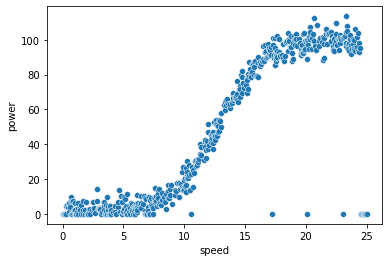

In [26]:
sns.scatterplot(data=df_wind, x="speed", y="power");

In [35]:
import numpy as np
a, m, n, t = 2011.1, 2.6650, 622.922, 1.4090

u = df_wind["speed"]

P_u = a * (1.0 + m * np.exp(-u / t)) / (1.0 + n * np.exp(-u / t))
P_u

0        11.813466
1        12.110692
2        12.173356
3        12.368134
4        12.503844
          ...     
495    2011.071184
496    2011.072678
497    2011.073159
498    2011.074550
499    2011.075437
Name: speed, Length: 500, dtype: float64

<AxesSubplot:xlabel='speed', ylabel='speed'>

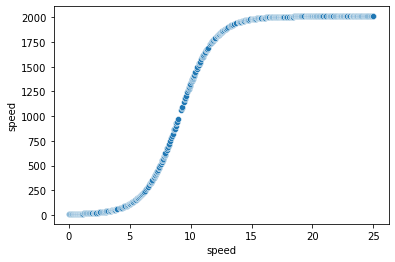

In [36]:
sns.scatterplot(x=df_wind["speed"], y=P_u)

$ P= \frac{1}{2}\rho A v^3 C_p $

$ P $ = Power $(W)$ 

$ \rho $ = Air Density $(kg/m^3)$

$ A = $ Swept Area $(m^2)$ 

$ v = $ Wind Speed $(m/s)$

$ C_p $ = Power Coefficient 

In [37]:
import numpy as np
rho = 1.23
A = (52**2) * 3.14
C_p = 0.4
v = np.linspace(0.0, 25.0, 500)
P = 0.5*rho*A*(v**3)*C_p

In [38]:
df_test = pd.DataFrame({"wind speed": v, "power":P})
df_test

,wind speed,power
0,0.000000,0.000000e+00
1,0.050100,2.626575e-01
2,0.100200,2.101260e+00
3,0.150301,7.091753e+00
4,0.200401,1.681008e+01
...,...,...
495,24.799599,3.185704e+07
496,24.849699,3.205050e+07
497,24.899800,3.224475e+07
498,24.949900,3.243978e+07


<AxesSubplot:xlabel='wind speed', ylabel='power'>

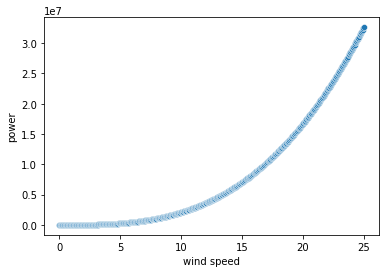

In [39]:
sns.scatterplot(x=df_test["wind speed"], y=df_test["power"])

## References

[1] Sustainable Energy Authority of Ireland, [www.seai.ie](https://www.seai.ie/technologies/wind-energy/#:~:text=Wind%20energy%20in%20Ireland,of%20renewable%20energy%20in%20Ireland.&text=In%202018%20Wind%20provided%2085,in%20Ireland%20after%20natural%20gas.)

[2] The Royal Academy of Engineering, Wind Turbine Power Calculations Publication, [www.raeng.org.uk](https://www.raeng.org.uk/publications/other/23-wind-turbine)